In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
# LOAD Data csv
recipe = pd.read_csv(r'recipes.csv',header=0,encoding = 'unicode_escape').dropna()  


In [3]:
recipe.tail(11)


,ingredients,diet
20119,"8 chicken legs,3 bay leaves,1 teaspoon dried t...",0
20120,"3 cups pitted dates (14 ounces),1 (750-ml) bot...",1
20121,"Cooking spray,One 3 1/2-pound chicken, cut int...",0
20122,"4 cups water,1 750-ml bottle vodka (about 3 1/...",0
20123,"1/2 cup plus 2 tablespoons water,1/2 cup sugar...",1
20124,"1 side pork spareribs, about 3 pounds,1/2 cup ...",0
20125,"2 large egg whites,3 oz Parmigiano-Reggiano, f...",0
20126,"5 1/2 cups (or more) low-salt chicken broth,2 ...",0
20127,"1 small tomato,1 small onion, finely chopped (...",0
20128,"4 tablespoons olive oil,4 shallots, thinly sli...",0


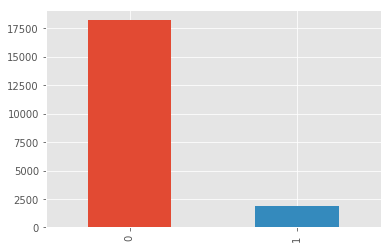

In [4]:
# vegan vs non-vegan count
plt.style.use('ggplot')
recipe['diet'].value_counts().plot(kind='bar')

In [5]:
# remove punctuation + numbers + non alphabetic characters
recipe['ingredients'] = recipe['ingredients'].str.replace("[^a-zA-Z]", ' ')

recipe['ingredients'].head(3)

0      cups low sodium vegetable or chicken stock  ...
1          cups whipping cream   medium onions  cho...
2      fennel bulb  sometimes called anise   stalks...
Name: ingredients, dtype: object

In [6]:

temp = []
for s in recipe['ingredients']:
    # Remove Stop Words
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(s)
    filtered_sentence = [w for w in word_tokens if w not in stop_words]
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    s = ' '.join(filtered_sentence)
    # Porter Stemmer Algorithm to Remove low-content adjectives
    ps = PorterStemmer()
    words = word_tokenize(s)
    word_ps = []
    for w in words:
        word_ps.append(ps.stem(w))
    s = ' '.join(word_ps)    
    temp.append(s)
recipe['ingredients'] = temp

print(recipe.head(3))

                                         ingredients  diet
0  cup low sodium veget chicken stock cup dri bro...     0
1  cup whip cream medium onion chop teaspoon salt...     0
2  fennel bulb sometim call anis stalk discard bu...     0


In [7]:
# convert the textual representation of information into  a matrix of TF-IDF features.
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(recipe['ingredients'])
print(X.size)
Y = []
Y = recipe['diet']

649598


In [8]:
# split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [20]:
# perform KNN Algorithm
# the value of K is chosen based on this function k = sqrt(n) where n is the number of data points
K=np.round(np.sqrt(len(recipe)))

neigh = KNeighborsClassifier(n_neighbors=71, weights='uniform', algorithm='auto')
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print("K:", K, "Accuracy is ", accuracy_score(y_test, y_pred) * 100, "%")

K: 142.0 Accuracy is  90.3990024937656 %


In [10]:

logistic = LogisticRegression()
logistic.fit(X_train, y_train)

print("Logistic Regression Accuracy is ", logistic.score(X_test, y_test) * 100, "%")

Logistic Regression Accuracy is  91.32169576059852 %


/home/hatoon/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print("Decision Tree Classifier Accuracy is ", tree.score(X_test, y_test) * 100, "%")

Decision Tree Classifier Accuracy is  91.49625935162095 %
